# Microsoft Palette
Palette file (\*.pal) is a binary file consisiting of the list of colors in hexadecimal format. Such files are used by various software, e.g. Originlab. 
Recent versions of Origin have nice set of palettes but sometimes own-designed one in desired.
The header of PAL file includes:
- ASCII text **RIFF** 
- INT number *file_size-8*
- ASCII text **PAL_** (with trailing space)
- ASCII text **data**
- INT number *file_size-20*
- INT numbers 0, 3, palette_size
, where *palette_size* is the number of colors, and *file_size* = *palette_size*\*4

### Example header file
First 8\*4=32 bytes

``f = open('palette.pal', 'rb')
for i in range(8):
    l = f.read(4)
    print(l)
f.close()
``

file size = 1048 bytes
- `b'RIFF'`
- `b'\x10\x04\x00\x00'` = 0x0410 = 1040
- `b'PAL '`
- `b'data'`
- `b'\x04\x04\x00\x00'` = 0x0404 = 1028
- `b'\x00\x03\x00\x01'` = 0, 3, 0x0100 = 256 colors
- `b'\x050a\x00'` First color, RGBA: 0x05 = 5, b'0' = 0x30 = 48, b'a' = 0x61 = 97, 0x00 = 0 
- `b'\x062d\x00'` Second color, RGBA: 0x06 = 6, b'2' = 0x32 = 50, b'd' = 0x64 = 100, 0x00 = 0 

In [293]:
def palette(colors, palette_size = 256, pos = None):
    if type(colors) == list:
        if type(colors[0]) == str:
            colors = [[int(color[1:3],16),int(color[3:5],16),int(color[5:],16)] for color in colors]
    elif type(colors) != np.ndarray:
        colors = np.array(colors)
        if colors.dtype != np.int:
            colors = (colors*255).astype(int)
    if pos is None:
        pos = np.linspace(0, palette_size-1,len(colors)).astype(int)
    else:
        pos = np.array((palette_size-1)*(pos - pos.min())/(pos.max()-pos.min())).astype(int)
    x = np.arange(palette_size)
    out = np.apply_along_axis(lambda a: np.interp(x, pos, a).astype(int), 0, colors)
    return out

In [310]:
# list of lists of colors 
# Both hexadecimal and RGB colors are accepted as well as rgb in [0..1] range
cols = [np.array([[55,49,149],[1,142,248],[73,219,112],[255,255,154],[188,160,112],[143,97,84],[182,154,143],[255,255,255]]), \
        ['#ffffd9', '#edf8b1', '#c7e9b4', '#7fcdbb', '#41b6c4', '#1d91c0', '#225ea8', '#253494', '#081d58'],\
        ['#984ea3','#377eb8','#4daf4a','#ffff33','#ff7f00','#e41a1c'], \
        [[23,127,63],[127,191,127],[255,255,95],[223,127,63],[191,0,31]], \
        [[0,63,191],[0,127,159],[127,191,127],[255,255,95],[223,127,63],[191,0,31],[159,0,0]],\
    ['#67001f','#b2182b','#d6604d','#f4a582','#fddbc7','#f7f7f7','#d1e5f0','#92c5de','#4393c3','#2166ac','#053061']]

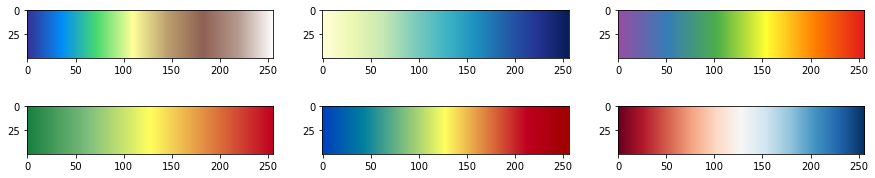

In [311]:
plt.rcParams['figure.figsize'] = (15,5)
for index, col in enumerate(cols):
    plt.subplot(3,3, index+1)
    out = palette(col)
    o = np.tile(out, (50,1,1))
    plt.imshow(o)

In [299]:
# write 'out' into 'palette.pal'
data_size = palette_size * 4
file_size = data_size + 24
lines = [b'RIFF', struct.pack('<I',file_size-8), b'PAL ', b'data', struct.pack('<I',file_size - 20), struct.pack('<BBH',0,3,palette_size)] 
f = open('palette.pal','wb+')
for line in lines:
    f.write(line)
for i in range(out.shape[0]):
    line = struct.pack('>BBBB',*out[i, :],0)
    f.write(line)
f.close()